In [ ]:
import pandas as pd
import sqlite3

In [ ]:
data = pd.read_csv('dataset.csv')

### 1. Загрузка и выгрузка данных ###

In [ ]:
sqlite_db = 'database.db'
conn = sqlite3.connect(sqlite_db)
data.to_sql('data_table', conn, if_exists='replace', index=False)

12305

In [ ]:
data = pd.read_sql('SELECT * FROM data_table', conn)
conn.close()

In [ ]:
data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
data.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


### 2. Linear, Logistic, SVM regression ###

###Linear Regression ###

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
unique_players = data.drop_duplicates(subset=['player_name'])

In [ ]:
unique_players

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,12285,McKinley Wright IV,MIN,23.0,180.34,87.089664,Colorado,USA,Undrafted,Undrafted,...,1.0,0.0,0.6,-25.8,0.000,0.000,0.082,0.833,0.231,2021-22
12291,12291,Matt Ryan,BOS,25.0,200.66,97.522280,Tennessee-Chattanooga,USA,Undrafted,Undrafted,...,3.0,0.0,0.0,25.0,0.000,0.000,0.357,0.300,0.000,2021-22
12299,12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,...,1.9,1.1,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [ ]:
data.isna().sum()

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1789
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            10516 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

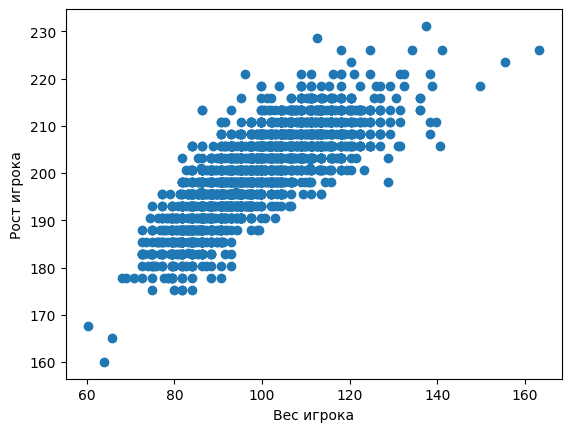

In [ ]:
X=unique_players['player_weight']
y=unique_players['player_height']
# нарисуем dataset
plt.scatter(X,y)
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)


X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

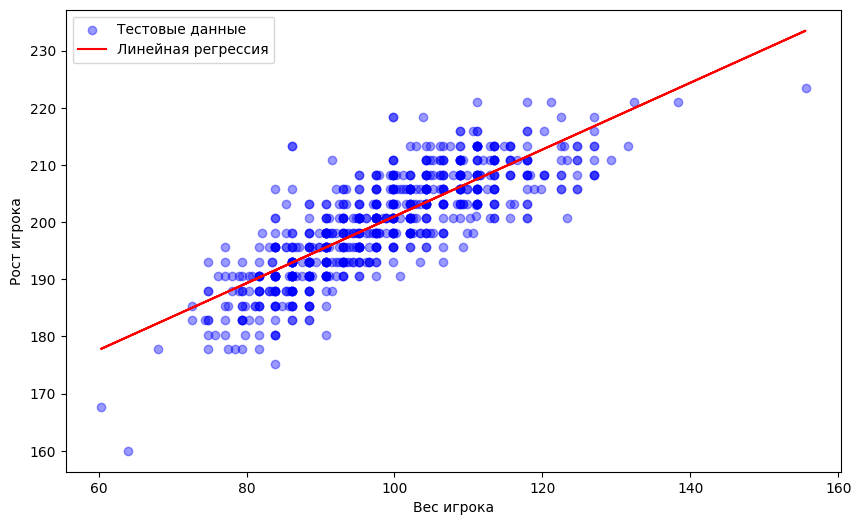

In [ ]:
# Построение визуализации линейной регрессии с использованием тестового набора данных
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные', alpha=0.4)  # Нарисуем тестовые данные
plt.plot(X_test, model.predict(X_test), color='red', label='Линейная регрессия')  # Нарисуем линию регрессии на тестовых данных
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')
plt.legend()
plt.show()

In [ ]:
print("Оценка модели на обучающем наборе:", model.score(X_train, y_train))
print("Оценка модели на тестовом наборе:", model.score(X_test, y_test))

Оценка модели на обучающем наборе: 0.6345462147133624
Оценка модели на тестовом наборе: 0.6675023698505886


### Logistic Regression ###

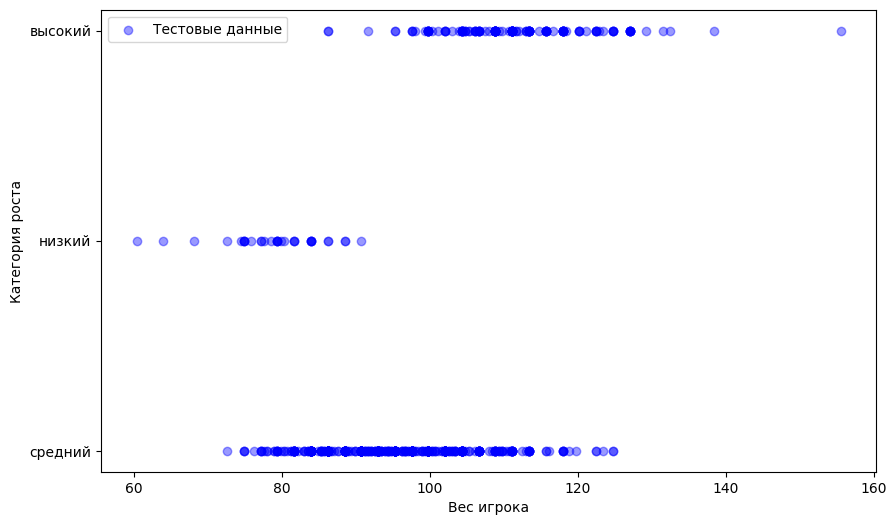

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Создание категорий роста игроков
unique_players = data.drop_duplicates(subset=['player_name'])
unique_players = unique_players.copy()
unique_players['height_category'] = pd.cut(data['player_height'], bins=3, labels=['низкий', 'средний', 'высокий'])

X = unique_players[['player_weight']]
y = unique_players['height_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Построение визуализации
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные', alpha=0.4)  # Нарисуем тестовые данные
plt.xlabel('Вес игрока')
plt.ylabel('Категория роста')
plt.legend()
plt.show()

In [ ]:
# Оценка точности на обучающих данных
train_accuracy = classifier.score(X_train, y_train)
print("Точность на обучающих данных:", train_accuracy)

# Оценка точности на тестовых данных
test_accuracy = classifier.score(X_test, y_test)
print("Точность на тестовых данных:", test_accuracy)


Точность на обучающих данных: 0.7827702310460931
Точность на тестовых данных: 0.7865655471289275


In [ ]:
data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,height_category
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,средний
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,высокий
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,средний
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,средний
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,средний


### SVM ###

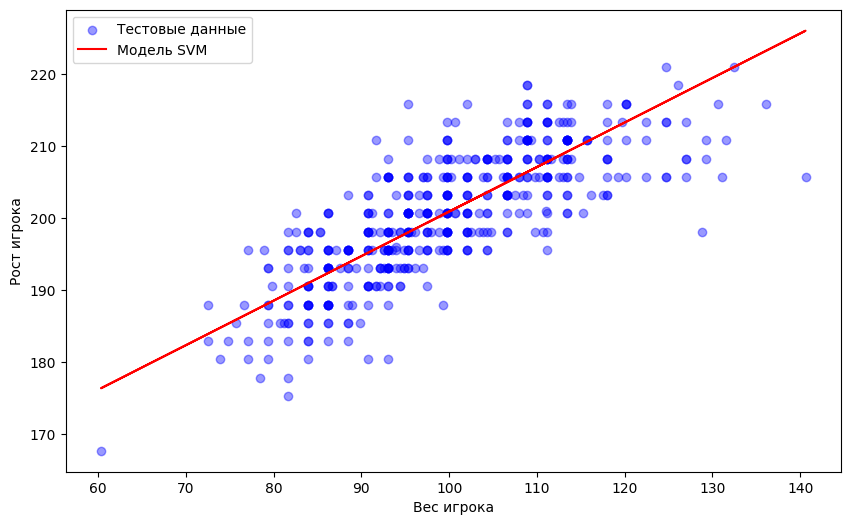

Точность модели SVM на обучающих данных: 0.652436664438234
Точность модели SVM на тестовых данных: 0.6049344320792149


In [ ]:
from sklearn.svm import SVR
import numpy as np

unique_players = data.drop_duplicates(subset=['player_name'])
unique_players = unique_players.copy()

X = unique_players[['player_weight']]
y = unique_players['player_height']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# Построение визуализации
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные', alpha=0.4)  # Нарисуем тестовые данные
plt.plot(X_test, svm_regressor.predict(X_test), color='red', label='Модель SVM')  # Нарисуем предсказания модели
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')
plt.legend()
plt.show()

# Оценка точности модели
train_accuracy = svm_regressor.score(X_train, y_train)
test_accuracy = svm_regressor.score(X_test, y_test)

print("Точность модели SVM на обучающих данных:", train_accuracy)
print("Точность модели SVM на тестовых данных:", test_accuracy)


### 3. Descision Tree ###

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Фильтрация данных за сезон 2010-11
df_2010_11 = data[data['season'] == '2010-11']

X = df_2010_11[['pts', 'reb', 'ast', 'player_height', 'player_weight']]
y = df_2010_11[['team_abbreviation']]

# Кодирование целевой переменной с помощью One-Hot Encoding
encoder = OneHotEncoder()
y_encoded_onehot = encoder.fit_transform(y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_onehot, test_size=0.2, random_state=9)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy на тестовых данных: {accuracy}")

dot_data = export_graphviz(tree_model, out_file=None, feature_names=X.columns, class_names=encoder.categories_[0], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='pdf', cleanup=True)

Accuracy на тестовых данных: 0.03296703296703297


'decision_tree.pdf'

###4. Классификация###

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Выбор атрибутов
X = data[['player_height', 'player_weight', 'pts']]  # Выбранные атрибуты для предсказания возраста
y = data['age']  # Целевая переменная - возраст игрока

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели классификации (Decision Tree Classifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy на тестовых данных: {accuracy}")

Accuracy на тестовых данных: 0.06989028850060951


Классификация за 2010-11 сезон целевой переменной counrtry (страна игрока) от характеристик 'reb', 'ast', 'net_rating' моделью DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = data[data['season'] == '2010-11']

# Выбор атрибутов
X = df[['reb', 'ast', 'net_rating']]  # атрибуты для предсказания страны (country)
y = df['country']  # Целевая переменная - страна игрока

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели классификации (Decision Tree Classifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy на тестовых данных: {accuracy}")

Accuracy на тестовых данных: 0.6043956043956044
